## Topic Analysis with LDA

This notebook demonstrates how to analyse topics in a dataset using a pre-trained LDA model. We'll use the Cohere/movies dataset from Hugging Face.

## Motivation

Understanding the underlying topics in a large collection of documents can provide valuable insights. Topic modeling helps in summarizing, organizing, and making sense of large text datasets. This can be particularly useful in various applications such as content recommendation, document classification, and trend analysis.

In this notebook, we will:
- Load a pre-trained LDA model
- Visualize topic distributions for documents
- Identify top words in each topic
- Use OpenAI to interpret the meaning of topics

## Setup

Load necessary libraries and modules.

In [ ]:
import numpy as np
import json
from src.topic_utils import TopicAnalyser
from src.openai_utils import interpret_topic_with_openai
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path



## Load Pre-trained Topic Model

Load the pre-trained LDA model and vocabulary.

In [ ]:
# Load the pre-trained topic model (model_3) from the models folder
model_name = 'model_4.pkl'
model_path = Path('./models') / model_name
with open(model_path, 'rb') as f:
    topic_model = pickle.load(f)

# Extract outcome matrices from the model
topics = topic_model.topic_word_
topic_mixtures = topic_model.doc_topic_

# Load the vocabulary from the data folder
vocab_path = Path('./data') / 'vocab.pkl'
with open(vocab_path, 'rb') as f:
    vocab = pickle.load(f)

## Define Topic Analyser

Initialize the TopicAnalyser with the loaded model data.

In [8]:
# Define the TopicAnalyser with the topic mixtures, topics, and vocabulary
topic_assistant = TopicAnalyser(topic_mixtures, topics, vocab)

## Visualize Topic Distribution

Visualize the topic distribution for a specific document. This helps us understand which topics are most predominant in the document.

[0.00526316 0.00526316 0.00526316 0.00526316 0.00526316 0.00526316
 0.00526316 0.11052632 0.00526316 0.00526316 0.00526316 0.11052632
 0.00526316 0.00526316 0.05789474 0.00526316 0.00526316 0.00526316
 0.16315789 0.00526316 0.00526316 0.00526316 0.00526316 0.00526316
 0.00526316 0.00526316 0.00526316 0.00526316 0.00526316 0.00526316
 0.00526316 0.00526316 0.00526316 0.00526316 0.05789474 0.00526316
 0.00526316 0.00526316 0.00526316 0.32105263]


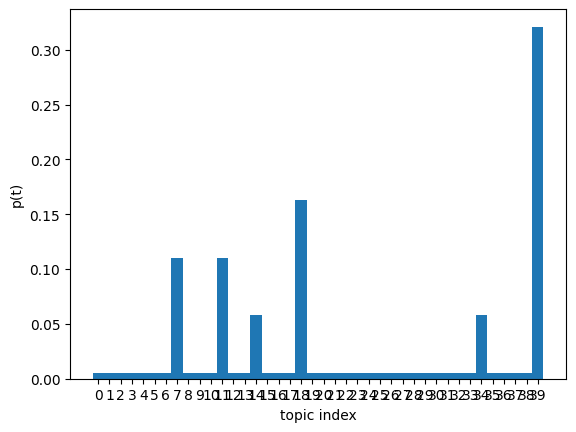

In [ ]:
# Print the topic distribution of the first document
topic_distribution_doc_0= topic_assistant.topic_mixtures[0]
print(topic_distribution_doc_0)
# Visualize the topic distribution of the first document
# This helps us understand which topics are most predominant in the document
topic_assistant.plot_document_distribution(0)

## Top Words in Topics

Print the top words for specific topics. These words help us understand the main themes of each topic.

In [ ]:
# Print the top words of the most representative topic of the first document
topic_id = np.argmax(topic_distribution_doc_0)
top_words_topic_11 = topic_assistant.get_top_words(topic_id)
print(top_words_topic_11)

['war', 'world', 'army', 'u', 'ii', 'american', 'soldiers', 'british', 'soldier', 'officer']


In [ ]:
# Print the top words of the second most representative topic of the first document
# The second most representative topic is the one with the second highest probability
topic_id = np.argsort(topic_distribution_doc_0)[::-1][1]
top_words_topic_6 = topic_assistant.get_top_words(topic_id)
print(top_words_topic_6)

['way', 'road', 'journey', 'world', 'trip', 'along', 'adventure', 'across', 'find', 'friends']


In [18]:
# Print the top words of the third most representative topic of the first document
# The third most representative topic is the one with the third highest probability
topic_id = np.argsort(topic_distribution_doc_0)[::-1][2]
top_words_topic_6 = topic_assistant.get_top_words(topic_id)
print(top_words_topic_6)

['earth', 'planet', 'crew', 'world', 'alien', 'space', 'race', 'human', 'mission', 'last']


## Interpret Topic with OpenAI

Use OpenAI to interpret the meaning of a topic based on its top words and top documents. This can provide a more human-readable understanding of the topic.

In [19]:
# Interpret topic 3 with OpenAI
topic_top_words = topic_assistant.get_top_words(topic_id)
interpret_topic_with_openai(topic_top_words)

INFO:httpx:HTTP Request: POST https://topichackaton.openai.azure.com//openai/deployments/gpt-35-turbo/chat/completions?api-version=2024-05-01-preview "HTTP/1.1 200 OK"


{'topic_name': 'Interstellar Exploration',
 'topic_description': 'Interstellar Exploration involves missions to distant planets, encountering alien races, and the survival of humanity in space. The crew embarks on a perilous journey to explore new worlds, potentially encountering unknown alien species. The mission is crucial for the future of humanity, representing the last hope for survival. The concept of space travel, the search for habitable planets, and the challenges faced by the crew in an unfamiliar world are central to this topic.'}